# Random Forest Model

RF model to be used for predicting protein coding genes in DNA sequences.

**Basis for any machine learning workflow**:
1. State the question and determine required data
2. Acquire the data in an accessible format
3. Identify and correct missing data points/anomalies as required
4. Prepare the data for the machine learning model
5. Establish a baseline model that you aim to exceed
6. Train the model on the training data
7. Make predictions on the test data
8. Compare predictions to the known test set targets and calculate performance metrics
9. If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique
10. Interpret model and report results visually and numerically

## Importing data

In [32]:
# Importing data
import pandas as pd
import time

# Preprocessing and encoding variables
import numpy as np
from sklearn import preprocessing

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Visualising feature importance and making plots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import pydot

In [33]:
G1 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/R/G1.features.csv')
G2 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/R/G2.features.csv')
G3 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/R/G3.features.csv')
G4 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/R/G4.features.csv')
G5 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/R/G5.features.csv')
G6 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/R/G6.features.csv')
G7 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/R/G7.features.csv')
#G8 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/R/G8.features.csv')
#G9 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/R/G9.features.csv')
#G10 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/R/G10.features.csv')
#G11 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/R/G11.features.csv')
#G12 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/R/G12.features.csv')
#G13 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/R/G13.features.csv')
#G14 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/R/G14.features.csv')
#G15 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/R/G15.features.csv')

frames = [G1, G2, G3, G4, G5, G6, G7]

df = pd.concat(frames)
df = df.iloc[: , 1:]

In [34]:
df.tail(10)

,Type,Length,Dataset,Genome,GC_content,GC1_content,GC2_content,GC3_content,Start_ATG,Start_GTG,...,TCG_c_weight,TCT_c_weight,TGA_c_weight,TGC_c_weight,TGG_c_weight,TGT_c_weight,TTA_c_weight,TTC_c_weight,TTG_c_weight,TTT_c_weight
10304,CDS,4767,1,7,0.503671,0.521082,0.488987,0.500944,1,0,...,0.055215,0.196319,0.0,0.000000,1,0.000000,0.125000,0.588235,0.136364,0.411765
10305,CDS,4851,1,7,0.579674,0.619048,0.472480,0.647495,1,0,...,0.084211,0.073684,0.0,0.500000,1,0.500000,0.058394,0.441860,0.058394,0.558140
10306,CDS,4935,1,7,0.519554,0.586018,0.390274,0.582371,1,0,...,0.098039,0.196078,1.0,0.631579,1,0.368421,0.155080,0.451220,0.128342,0.548780
10307,CDS,4962,1,7,0.531237,0.626360,0.415961,0.551391,1,0,...,0.141509,0.103774,0.0,0.666667,1,0.333333,0.125000,0.555556,0.155000,0.444444
10308,CDS,5103,1,7,0.492455,0.533216,0.439153,0.504997,1,0,...,0.125000,0.075000,0.0,0.500000,1,0.500000,0.108696,0.391304,0.123188,0.608696
10309,CDS,6315,1,7,0.488678,0.582423,0.422328,0.461283,1,0,...,0.099338,0.178808,0.0,0.486486,1,0.513514,0.220884,0.356164,0.188755,0.643836
10310,CDS,6342,1,7,0.529328,0.610218,0.405393,0.572375,1,0,...,0.148148,0.125926,1.0,0.461538,1,0.538462,0.103004,0.447059,0.137339,0.552941
10311,CDS,8382,1,7,0.542949,0.632785,0.438440,0.557623,1,0,...,0.159236,0.121019,0.0,0.000000,1,0.000000,0.069307,0.575000,0.079208,0.425000
10312,CDS,9510,1,7,0.313985,0.380442,0.315773,0.245741,1,0,...,0.062914,0.231788,0.0,0.238095,1,0.761905,0.442997,0.164286,0.159609,0.835714
10313,CDS,15876,1,7,0.611426,0.552532,0.541194,0.740552,0,1,...,0.115315,0.023423,0.0,1.000000,1,0.000000,0.117470,0.367347,0.075301,0.632653


## Pre-processing / Data preparation

1. One-hot encoded categorical variables
2. Split data into features and labels
3. Convert to arrays
4. Split data into training and testing sets

### Encoding target values

In [35]:
def encode_feature(array):
    """ Encode a categorical array into a number array
    
    :param array: array to be encoded
    :return: numerical array
    """
  
    encoder = preprocessing.LabelEncoder()
    encoder.fit(array)
    return encoder.transform(array)

In [36]:
class_names = ['CDS', 'LORF']
targets = df["Type"].values
print(targets)

['CDS' 'CDS' 'CDS' ... 'CDS' 'CDS' 'CDS']


In [37]:
targets = encode_feature(targets)
print(targets)

[0 0 0 ... 0 0 0]


In [44]:
print('The shape of our dataframe is:', df.shape)
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])

The shape of our dataframe is: (53276, 5531)
Rows: 53276
Columns: 5531


### Checking for anomalies

In [8]:
# Descriptive statistics for each column
df.describe()

,Length,Dataset,Genome,GC_content,GC1_content,GC2_content,GC3_content,Start_ATG,Start_GTG,Start_TTG,...,TCG_c_weight,TCT_c_weight,TGA_c_weight,TGC_c_weight,TGG_c_weight,TGT_c_weight,TTA_c_weight,TTC_c_weight,TTG_c_weight,TTT_c_weight
count,53276.000000,53276.000000,53276.000000,53276.000000,53276.000000,53276.000000,53276.000000,53276.000000,53276.000000,53276.000000,...,53276.000000,53276.000000,53276.000000,53276.000000,53276.000000,53276.000000,53276.000000,53276.000000,53276.000000,53276.000000
mean,705.051224,1.199583,3.648885,0.540475,0.579060,0.456876,0.585490,0.616450,0.200240,0.182334,...,0.165590,0.118474,0.407168,0.542060,0.774307,0.298149,0.129248,0.481726,0.152215,0.455394
std,625.702834,0.399691,2.069102,0.089492,0.131922,0.109394,0.148530,0.486255,0.400184,0.386123,...,0.165161,0.153750,0.491233,0.389848,0.418042,0.336164,0.171087,0.335871,0.171805,0.333397
min,9.000000,1.000000,1.000000,0.136364,0.058824,0.047619,0.066667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,285.000000,1.000000,2.000000,0.489982,0.500000,0.388235,0.491803,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.230769,0.029412,0.111111
50%,540.000000,1.000000,3.000000,0.534063,0.582865,0.432342,0.577586,1.000000,0.000000,0.000000,...,0.142857,0.074074,0.000000,0.600000,1.000000,0.200000,0.068966,0.470588,0.111111,0.500000
75%,969.000000,1.000000,5.000000,0.585450,0.646902,0.500000,0.654930,1.000000,0.000000,0.000000,...,0.250000,0.187500,1.000000,1.000000,1.000000,0.500000,0.200000,0.750000,0.200000,0.700000
max,16884.000000,2.000000,7.000000,0.790960,0.973485,0.970060,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Selecting features and targets and converting data to arrays

In [39]:
# Labels are the values we want to predict
labels = targets

# Remove the labels from the features -> axis 1 refers to the columns
features = df.drop(['Type','Genome', 'Dataset'], axis = 1)

# Saving feature names as list for later use
feature_names = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [41]:
print('The shape of our features are:', features.shape)

The shape of our features are: (53276, 5528)


### Split into training and testing sets

In [45]:
# Split the data into training and testing sets -> x = features and y = labels/targets
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [46]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (39957, 5528)
Training Labels Shape: (39957,)
Testing Features Shape: (13319, 5528)
Testing Labels Shape: (13319,)


## Establish baseline 

Comparison to Prodigal?

## Train model

**RandomForestClassifier**(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100, random_state = 42)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

## Make predictions on test set

In [48]:
pred_y = clf.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))

Accuracy: 0.8784443276522261


## Hyperparameter tuning

The most common way to do this is simply make a bunch of models with different settings, evaluate them all on the same validation set, and see which one does best. Of course, this would be a tedious process to do by hand, and there are automated methods to do this process in Skicit-learn. Hyperparameter tuning is often more engineering than theory-based, and I would encourage anyone interested to check out the documentation and start playing around! Keep in mind that the first model built will almost never be the model that makes it to production.

In [27]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Finding important features

1. Create a random forests model.
2. Use the feature importance variable to see feature importance scores.
3. Visualize these scores using the seaborn library.

In [49]:
feature_imp = pd.Series(clf.feature_importances_, index = feature_names).sort_values(ascending=False)

print(feature_imp)

GC2_content     0.016176
Start_ATG       0.014012
Start_TTG       0.013087
CGT_c_weight    0.010645
CTG_c_weight    0.010258
                  ...   
TCTAGT          0.000006
TTCTAG          0.000004
TAGGAC          0.000004
CTAGGA          0.000003
TCCTAG          0.000003
Length: 5528, dtype: float64


In [51]:
# Get numerical feature importances
importances = list(clf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: GC2_content          Importance: 0.01618
Variable: Start_ATG            Importance: 0.01401
Variable: Start_TTG            Importance: 0.01309
Variable: CGT_c_weight         Importance: 0.01065
Variable: CTG_c_weight         Importance: 0.01026
Variable: TAT_c_weight         Importance: 0.00922
Variable: CTAT                 Importance: 0.00782
Variable: Length               Importance: 0.00774
Variable: ATGAA                Importance: 0.00726
Variable: GC3_content          Importance: 0.0072
Variable: GC1_content          Importance: 0.00701
Variable: ATA_c_weight         Importance: 0.00693
Variable: CTA                  Importance: 0.00681
Variable: TGAAA                Importance: 0.00663
Variable: TGAA                 Importance: 0.00595
Variable: CCG_c_weight         Importance: 0.0056
Variable: GTG_c_weight         Importance: 0.00532
Variable: ACC_c_weight         Importance: 0.00507
Variable: CCAG                 Importance: 0.00493
Variable: CTGA                 Im

Variable: CTGTG                Importance: 0.00011
Variable: CTTCT                Importance: 0.00011
Variable: GAATA                Importance: 0.00011
Variable: GAATG                Importance: 0.00011
Variable: GACAC                Importance: 0.00011
Variable: GAGCA                Importance: 0.00011
Variable: GAGGT                Importance: 0.00011
Variable: GATAC                Importance: 0.00011
Variable: GATAG                Importance: 0.00011
Variable: GCACG                Importance: 0.00011
Variable: GCATG                Importance: 0.00011
Variable: GCCTT                Importance: 0.00011
Variable: GCGAG                Importance: 0.00011
Variable: GCGGG                Importance: 0.00011
Variable: GCTCT                Importance: 0.00011
Variable: GCTTA                Importance: 0.00011
Variable: GGAAT                Importance: 0.00011
Variable: GGACG                Importance: 0.00011
Variable: GGATC                Importance: 0.00011
Variable: GGCAC                

Variable: CGCATA               Importance: 7e-05
Variable: CGCCGT               Importance: 7e-05
Variable: CGCCTA               Importance: 7e-05
Variable: CGCCTT               Importance: 7e-05
Variable: CGCGTA               Importance: 7e-05
Variable: CGCTGC               Importance: 7e-05
Variable: CGGAAA               Importance: 7e-05
Variable: CGGCAG               Importance: 7e-05
Variable: CGGGAA               Importance: 7e-05
Variable: CGGGCC               Importance: 7e-05
Variable: CGGGGC               Importance: 7e-05
Variable: CGGGGG               Importance: 7e-05
Variable: CGGTAA               Importance: 7e-05
Variable: CGGTGA               Importance: 7e-05
Variable: CGTATG               Importance: 7e-05
Variable: CGTCAA               Importance: 7e-05
Variable: CGTCAG               Importance: 7e-05
Variable: CGTGCT               Importance: 7e-05
Variable: CGTGGC               Importance: 7e-05
Variable: CGTTCA               Importance: 7e-05
Variable: CGTTGA    

Variable: AGGAGA               Importance: 5e-05
Variable: AGGCAG               Importance: 5e-05
Variable: AGGCCA               Importance: 5e-05
Variable: AGGGCC               Importance: 5e-05
Variable: AGGGTT               Importance: 5e-05
Variable: AGGTAT               Importance: 5e-05
Variable: AGGTCG               Importance: 5e-05
Variable: AGGTGA               Importance: 5e-05
Variable: AGGTGC               Importance: 5e-05
Variable: AGGTTC               Importance: 5e-05
Variable: AGTAAA               Importance: 5e-05
Variable: AGTACC               Importance: 5e-05
Variable: AGTCAT               Importance: 5e-05
Variable: AGTCTG               Importance: 5e-05
Variable: AGTGAG               Importance: 5e-05
Variable: AGTTAT               Importance: 5e-05
Variable: AGTTCG               Importance: 5e-05
Variable: ATAAGC               Importance: 5e-05
Variable: ATAAGG               Importance: 5e-05
Variable: ATAATC               Importance: 5e-05
Variable: ATACCA    

Variable: GAATTG               Importance: 4e-05
Variable: GACAAT               Importance: 4e-05
Variable: GACACA               Importance: 4e-05
Variable: GACACG               Importance: 4e-05
Variable: GACAGA               Importance: 4e-05
Variable: GACAGT               Importance: 4e-05
Variable: GACATA               Importance: 4e-05
Variable: GACATC               Importance: 4e-05
Variable: GACCAA               Importance: 4e-05
Variable: GACCGG               Importance: 4e-05
Variable: GACGGG               Importance: 4e-05
Variable: GACTAC               Importance: 4e-05
Variable: GACTCG               Importance: 4e-05
Variable: GACTCT               Importance: 4e-05
Variable: GACTGA               Importance: 4e-05
Variable: GACTGC               Importance: 4e-05
Variable: GACTTA               Importance: 4e-05
Variable: GAGAGT               Importance: 4e-05
Variable: GAGATA               Importance: 4e-05
Variable: GAGATG               Importance: 4e-05
Variable: GAGCGA    

Variable: CCCCAT               Importance: 2e-05
Variable: CCCCCA               Importance: 2e-05
Variable: CCCCCC               Importance: 2e-05
Variable: CCCCTA               Importance: 2e-05
Variable: CCCTAA               Importance: 2e-05
Variable: CCCTCC               Importance: 2e-05
Variable: CCGTGT               Importance: 2e-05
Variable: CCTAAA               Importance: 2e-05
Variable: CCTAAT               Importance: 2e-05
Variable: CCTCTA               Importance: 2e-05
Variable: CCTTGG               Importance: 2e-05
Variable: CCTTGT               Importance: 2e-05
Variable: CGAGCC               Importance: 2e-05
Variable: CGAGGT               Importance: 2e-05
Variable: CGAGTA               Importance: 2e-05
Variable: CGCTAG               Importance: 2e-05
Variable: CGGTTA               Importance: 2e-05
Variable: CGTACC               Importance: 2e-05
Variable: CGTGAG               Importance: 2e-05
Variable: CGTGTC               Importance: 2e-05
Variable: CTAACG    

**Features that have 0.01 - 0.02 in feature importance:**
- GC2_content
- Length
- GC1_content
- GC3_content
- Start_ATG 
- Start_TTG
- CTA
- CTAT 
- TGAA
- ATGAA
- TGAAA
- ACC_c_weight
- ATA_c_weight
- CCG_c_weight 
- CGT_c_weight
- CTG_c_weight
- GTG_c_weight
- TAT_c_weight    

### Visualization

In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index = feature_names).sort_values(ascending=False)

No handles with labels found to put in legend.


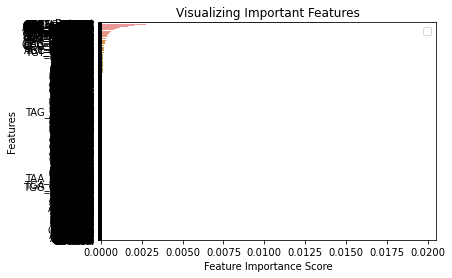

In [18]:
%matplotlib inline

# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Generating the model on selected features

After removing the least important features the accuracy may increase. This is because one removes misleading data and noise, resulting in increased accuracy. A lesser amount of features also reduces the training time.

In [54]:
# Create a Gaussian Classifier
clf_imp = RandomForestClassifier(n_estimators=100, random_state = 42)

# Extract the two most important features
important_indices = [feature_names.index('GC2_content'), feature_names.index('Start_ATG'), 
                     feature_names.index('Start_TTG'), feature_names.index('CGT_c_weight'), 
                     feature_names.index('CTG_c_weight'), feature_names.index('TAT_c_weight'), 
                     feature_names.index('CTAT'), feature_names.index('Length'), 
                     feature_names.index('ATGAA'), feature_names.index('GC3_content'),
                     feature_names.index('GC1_content'), feature_names.index('ATA_c_weight'), 
                     feature_names.index('CTA'), feature_names.index('TGAAA')]

train_important = train_x[:, important_indices]
test_important = test_x[:, important_indices]

In [59]:
# Train the random forest
clf_imp.fit(train_important, train_y)

RandomForestClassifier(random_state=42)

In [61]:
# Make predictions and determine the error
pred_y = clf_imp.predict(test_important)

In [64]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(test_y, pred_y))

Accuracy: 0.8918837750581875


### Visualization

In [67]:
feature_names = ['GC2_content', 'Start_ATG', 'Start_TTG', 'CGT_c_weight', 
                 'CTG_c_weight', 'TAT_c_weight', 'CTAT', 'Length', 'ATGAA', 
                 'GC3_content', 'GC1_content', 'ATA_c_weight', 'CTA', 'TGAAA']

In [68]:
feature_imp = pd.Series(clf_imp.feature_importances_, index = feature_names).sort_values(ascending=False)

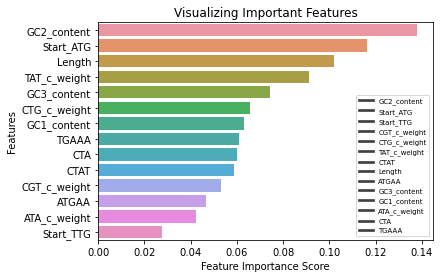

In [74]:
%matplotlib inline

# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend(feature_names, loc ="lower right", fontsize='x-small')
plt.show()

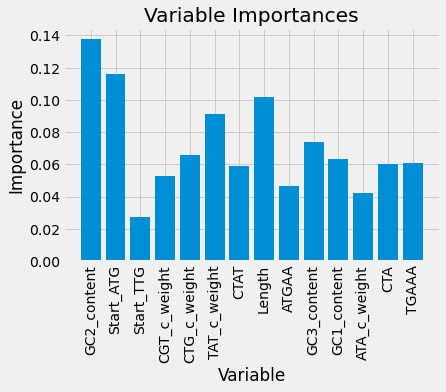

In [76]:
# Set the style
plt.style.use('fivethirtyeight')

importances = list(clf_imp.feature_importances_)

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_names, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Visualizing a single decision tree

With sklearn we can examine any of the trees in the forest. We will select one tree, and save the whole tree as an image.

In [22]:
# Pull out one tree from the forest
tree = clf.estimators_[5]

# Pull out one tree from the forest
tree = clf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_names, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [23]:
# Write graph to a png file
graph.write_png('tree.png')

FileNotFoundError: [Errno 2] "dot" not found in path.

In [26]:
# Limit depth of tree to 3 levels
clf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
clf_small.fit(train_x, train_y)

# Extract the small tree
tree_small = clf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_names, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

FileNotFoundError: [Errno 2] "dot" not found in path.